# 1. Librerias

In [1]:
import pandas as pd

# 2. Importamos CSV

In [2]:
ruta_archivo_csv = '../01_data/comentarios_beer.csv'

df_beer = pd.read_csv(ruta_archivo_csv, sep=';')

df_beer.head()

,fecha,nota_total,grupo_de,calidad_del_espectáculo,puesta_en_escena,interpretación_artística
0,2018-03-12,10.0,en pareja,10.0,10.0,10.0
1,2018-03-12,10.0,con amigos,10.0,10.0,10.0
2,2018-03-12,10.0,con amigos,10.0,10.0,10.0
3,2018-03-12,10.0,con amigos,10.0,10.0,10.0
4,2018-03-12,10.0,solo,10.0,10.0,10.0


# 3. Calculo de columnas

In [3]:
# Convierte la columna 'fecha' al formato de fecha y hora
df_beer['fecha'] = pd.to_datetime(df_beer['fecha'])

# Ordena los datos por la columna 'fecha' en orden cronológico
df_beer = df_beer.sort_values(by='fecha')

# Crea una nueva columna 'Comentarios Acumulados' con el sumatorio acumulativo de las filas
df_beer['nota_acumulada'] = df_beer['nota_total'].cumsum()

# Crea una nueva columna 'Numero Comentarios Acumulados' con el número acumulativo de comentarios
df_beer['Numero_comentarios_acumulados'] = df_beer.index + 1

df_beer.head(20)

,fecha,nota_total,grupo_de,calidad_del_espectáculo,puesta_en_escena,interpretación_artística,nota_acumulada,Numero_comentarios_acumulados
0,2018-03-12,10.0,en pareja,10.0,10.0,10.0,10.0,1
1,2018-03-12,10.0,con amigos,10.0,10.0,10.0,20.0,2
2,2018-03-12,10.0,con amigos,10.0,10.0,10.0,30.0,3
3,2018-03-12,10.0,con amigos,10.0,10.0,10.0,40.0,4
4,2018-03-12,10.0,solo,10.0,10.0,10.0,50.0,5
5,2018-03-12,10.0,en pareja,10.0,10.0,10.0,60.0,6
6,2018-03-12,10.0,con amigos,10.0,10.0,10.0,70.0,7
7,2018-03-12,10.0,con amigos,10.0,10.0,10.0,80.0,8
14,2018-04-12,8.3,en pareja,7.5,7.5,10.0,88.3,15
13,2018-04-12,10.0,con amigos,10.0,10.0,10.0,98.3,14


In [4]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   fecha                          807 non-null    datetime64[ns]
 1   nota_total                     807 non-null    float64       
 2   grupo_de                       807 non-null    object        
 3   calidad_del_espectáculo        807 non-null    float64       
 4   puesta_en_escena               807 non-null    float64       
 5   interpretación_artística       807 non-null    float64       
 6   nota_acumulada                 807 non-null    float64       
 7   Numero_comentarios_acumulados  807 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 56.7+ KB


In [6]:
df_beer['Nota Media Acumulada'] = df_beer['nota_total'].expanding().mean()

NameError: name 'df' is not defined

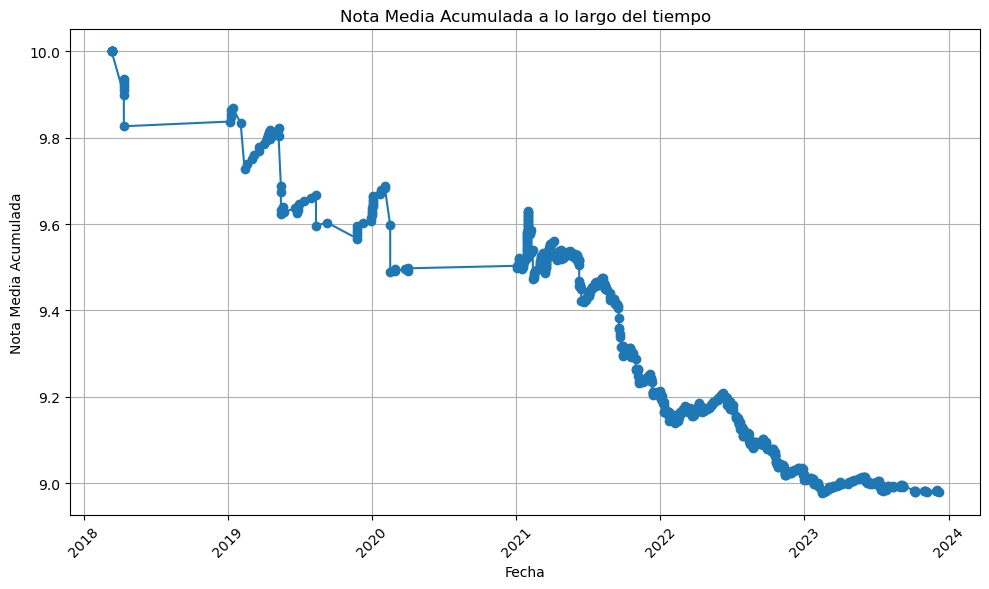

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que has cargado tus datos en un DataFrame llamado 'df_beer'
# Convierte la columna 'fecha' al formato de fecha y hora
df_beer['fecha'] = pd.to_datetime(df_beer['fecha'])

# Ordena los datos por la columna 'fecha' en orden cronológico
df_beer = df_beer.sort_values(by='fecha')

# Crea una nueva columna 'Nota Media Acumulada' con la nota media acumulada hasta la fecha actual
df_beer['Nota Media Acumulada'] = df_beer['nota_total'].expanding().mean()

# Crear la gráfica
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Graficar la nota media acumulada a lo largo del tiempo
plt.plot(df_beer['fecha'], df_beer['Nota Media Acumulada'], marker='o')

plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('Nota Media Acumulada')  # Etiqueta del eje y
plt.title('Nota Media Acumulada a lo largo del tiempo')  # Título de la gráfica
plt.grid(True)  # Mostrar cuadrícula

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad

plt.tight_layout()  # Ajustar el diseño

plt.show()  # Mostrar la gráfica

# 4. Guardamos

In [5]:
# Especifico la ruta y el nombre del archivo CSV
ruta_archivo_csv = '../01_data/comentarios_beer.csv'

# Guardo el DataFrame en un archivo CSV
df_beer.to_csv(ruta_archivo_csv, index=False, sep=';')